<a href="https://colab.research.google.com/github/Srinivas-Bhamidipati/My_DataScience_Portfolio/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading CSV Dataset file from **Kaggle**


In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('churn.csv')
df.head()

Saving churn.csv to churn (2).csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Checking for nulls**

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


# **Checking for Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

# Checking categoric and numeric columns

In [ ]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
df.select_dtypes(include='number').columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df['CreditScore'].quantile(0.25)

np.float64(584.0)

# **Visually checking for outliers using Box plots**

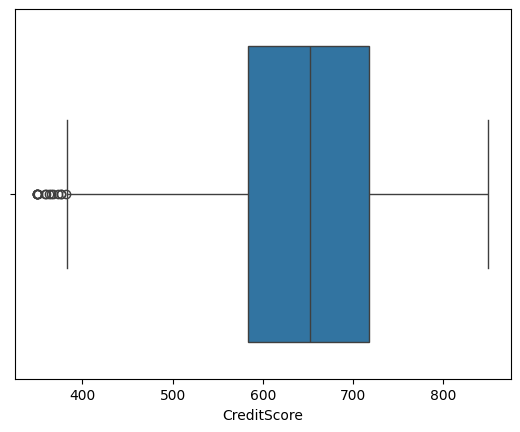

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['CreditScore'].describe()
sns.boxplot(x=df['CreditScore'])
plt.show()

In [ ]:
df[df['CreditScore'] < 400]['Exited'].value_counts(normalize=True)

,proportion
Exited,
1,1.0


In [ ]:
df[df['CreditScore'] < 400]['CreditScore'].describe()

,CreditScore
count,19.000000
mean,367.526316
std,16.173945
min,350.000000
25%,350.500000
50%,365.000000
75%,379.000000
max,399.000000


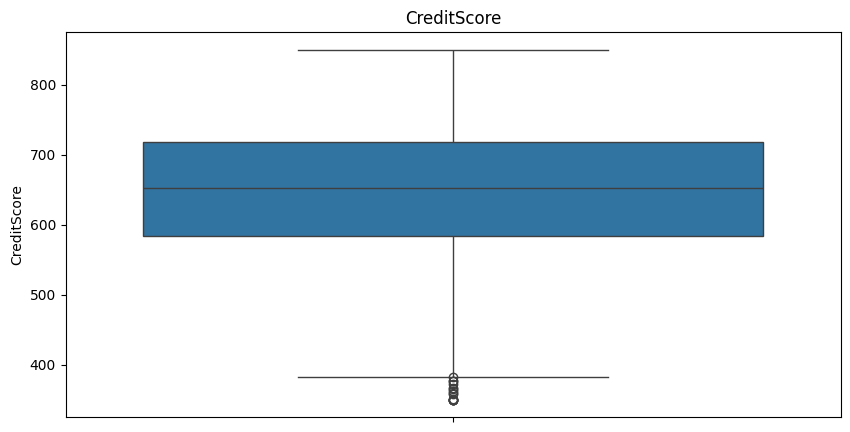

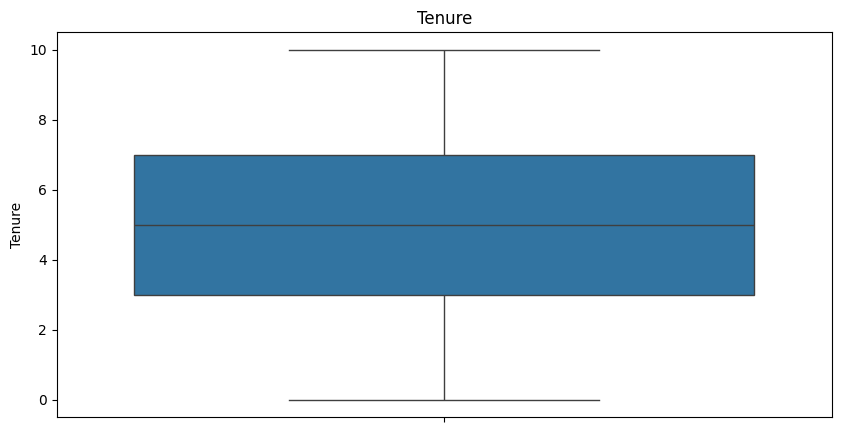

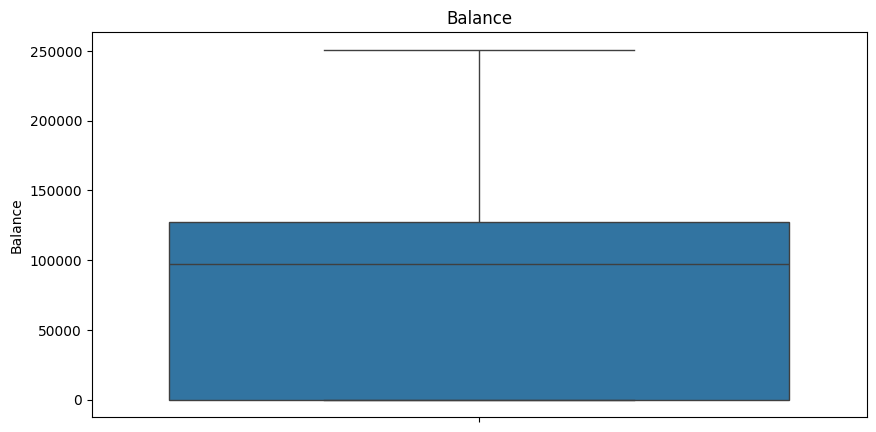

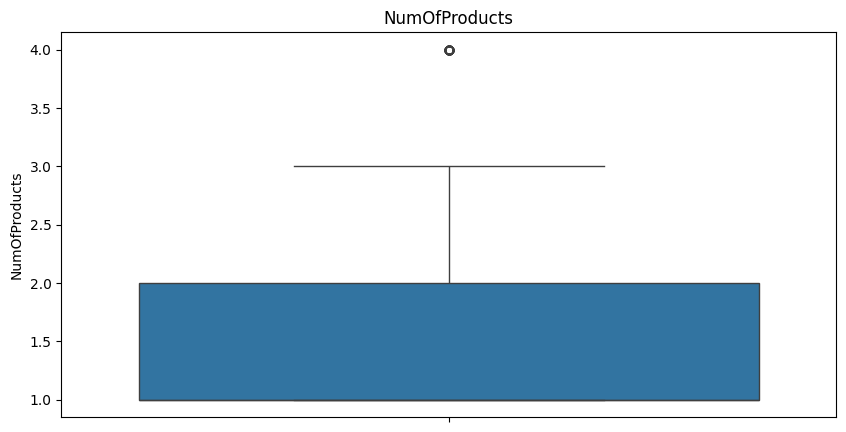

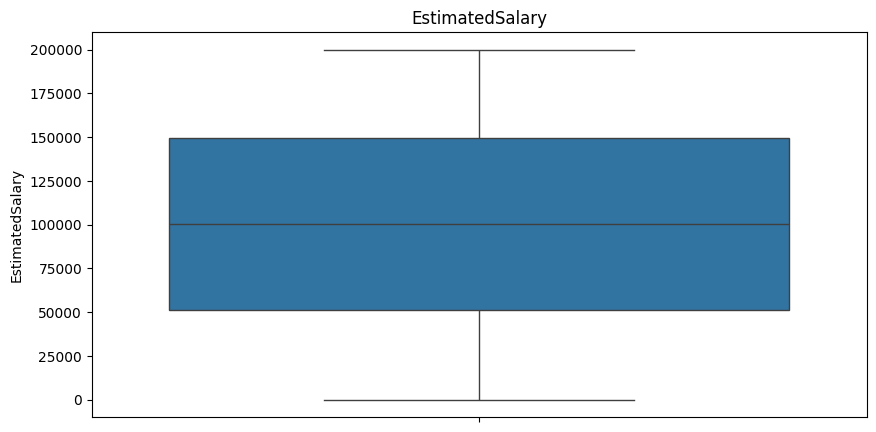

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in ['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.title(f"{col}")
  plt.show()


In [ ]:
df['EstimatedSalary'].skew()

np.float64(0.0020853576615585162)

In [ ]:
df['CreditScore'].quantile(0.25)

np.float64(584.0)

In [ ]:
df.shape

(10000, 14)

In [ ]:
df['low_cat']=np.where(df['CreditScore']<400,'low','normal')

In [ ]:
df.groupby('low_cat')['Exited'].mean()

,Exited
low_cat,
low,1.000000
normal,0.202184


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,low_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,normal
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,normal
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,normal
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,normal
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,normal


In [ ]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


# Seperated Numeric and categoric columns

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [ ]:
num_cols.shape

(11,)

In [ ]:
cat_cols.shape

(4,)

In [ ]:
num_cols

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
cat_cols

Index(['Surname', 'Geography', 'Gender', 'low_cat'], dtype='object')

# Checking correlation using correlation coefficient

In [ ]:
df[['CreditScore','Balance','EstimatedSalary','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']].corr()

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember
CreditScore,1.000000,0.006268,-0.001384,-0.003965,0.000842,0.012238,-0.005458,0.025651
Balance,0.006268,1.000000,0.012797,0.028308,-0.012254,-0.304180,-0.014858,-0.010084
EstimatedSalary,-0.001384,0.012797,1.000000,-0.007201,0.007784,0.014204,-0.009933,-0.011421
Age,-0.003965,0.028308,-0.007201,1.000000,-0.009997,-0.030680,-0.011721,0.085472
Tenure,0.000842,-0.012254,0.007784,-0.009997,1.000000,0.013444,0.022583,-0.028362
NumOfProducts,0.012238,-0.304180,0.014204,-0.030680,0.013444,1.000000,0.003183,0.009612
HasCrCard,-0.005458,-0.014858,-0.009933,-0.011721,0.022583,0.003183,1.000000,-0.011866
IsActiveMember,0.025651,-0.010084,-0.011421,0.085472,-0.028362,0.009612,-0.011866,1.000000


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,low_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,normal
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,normal
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,normal
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,normal
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,normal


# **Checking numeric features relation with target using box plot to select features**

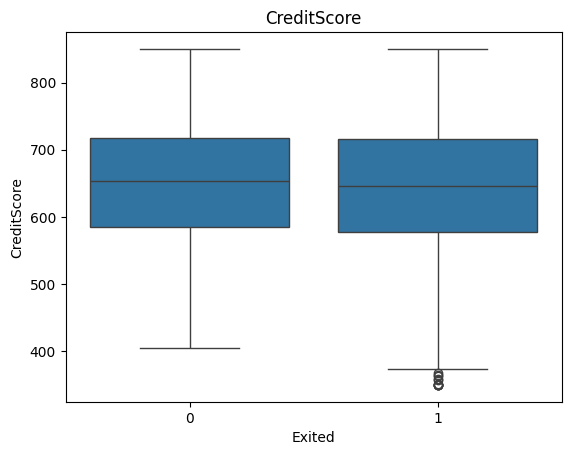

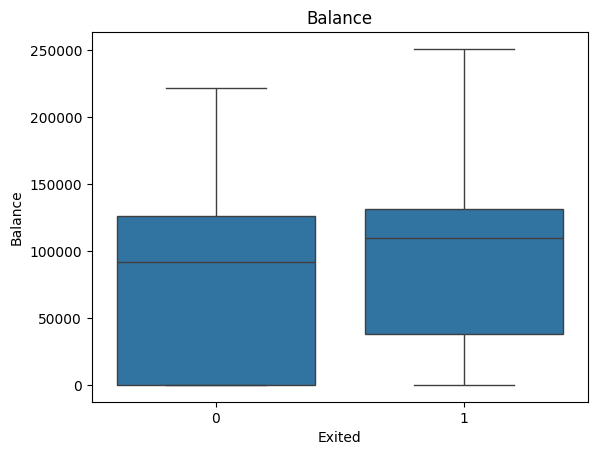

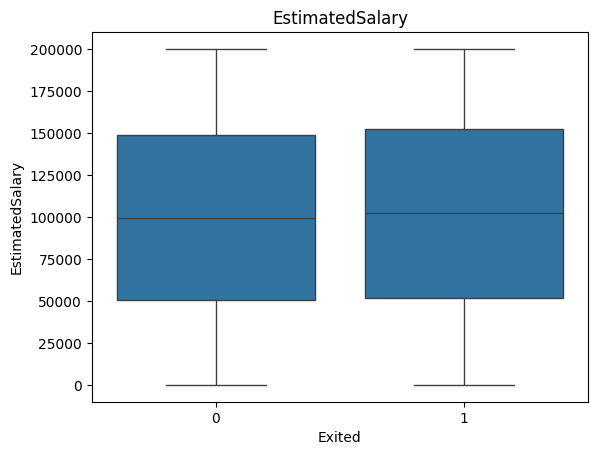

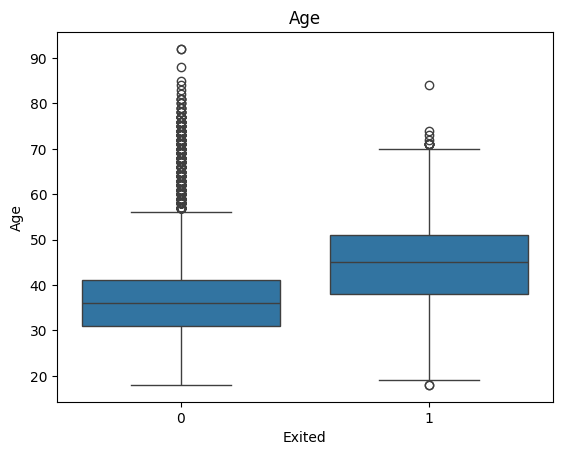

In [ ]:
for col in ['CreditScore','Balance','EstimatedSalary','Age']:
  sns.boxplot(x='Exited',y=col,data=df)
  plt.title(f"{col}")
  plt.show()


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'low_cat'],
      dtype='object')

# **Performed ANOVA on numeric features as a part of feature selection**

In [ ]:
from scipy.stats import f_oneway
for col in ['CreditScore','Balance','EstimatedSalary','Age','NumOfProducts','Tenure','HasCrCard','IsActiveMember']:
  f_stat,p_val=f_oneway(df[df['Exited']==0][col],df[df['Exited']==1][col])
  print(f"{col}: F-statistic = {f_stat:.3f}, p-value = {p_val:.5f}")

CreditScore: F-statistic = 7.345, p-value = 0.00674
Balance: F-statistic = 142.474, p-value = 0.00000
EstimatedSalary: F-statistic = 1.463, p-value = 0.22644
Age: F-statistic = 886.063, p-value = 0.00000
NumOfProducts: F-statistic = 22.915, p-value = 0.00000
Tenure: F-statistic = 1.960, p-value = 0.16153
HasCrCard: F-statistic = 0.509, p-value = 0.47541
IsActiveMember: F-statistic = 249.801, p-value = 0.00000


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,low_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,normal
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,normal
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,normal
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,normal
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,normal


In [ ]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [ ]:
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,low_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,normal
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,normal
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,normal
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,normal
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,normal


In [ ]:
df['NumOfProducts'] = df['NumOfProducts'].astype('category')

# **Performed Chi-Square for categorical features as a part of feature selection**

In [ ]:
from scipy.stats import chi2_contingency

for col in ['HasCrCard', 'IsActiveMember','Geography','Gender','NumOfProducts']:
    contingency = pd.crosstab(df[col], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.5f}")

HasCrCard: p-value = 0.49237
IsActiveMember: p-value = 0.00000
Geography: p-value = 0.00000
Gender: p-value = 0.00000
NumOfProducts: p-value = 0.00000


In [ ]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['Tenure'], df['Exited'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(p)

0.17758462026413294


In [ ]:
cat_cols

Index(['Surname', 'Geography', 'Gender', 'low_cat'], dtype='object')

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,low_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,normal
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,normal
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,normal
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,normal
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,normal


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,low_cat,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,normal,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,normal,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,normal,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,normal,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,normal,False,True,False


# **Performed one hot encoding for Categorical features**

In [ ]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'low_cat', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [ ]:
X = df.drop(['Exited', 'HasCrCard', 'EstimatedSalary', 'Tenure','low_cat'], axis=1)
y = df['Exited']

In [ ]:
df = df.drop('low_cat', axis=1)

In [ ]:
X.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,0.00,1,1,False,False,False
1,608,41,83807.86,1,1,False,True,False
2,502,42,159660.80,3,0,False,False,False
3,699,39,0.00,2,0,False,False,False
4,850,43,125510.82,1,1,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# **Scaled using Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,0.00,1,1,False,False,False
1,608,41,83807.86,1,1,False,True,False
2,502,42,159660.80,3,0,False,False,False
3,699,39,0.00,2,0,False,False,False
4,850,43,125510.82,1,1,False,True,False


In [ ]:
X_train_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled.head()
X_test_scaled.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,-0.680735,-0.279932,-1.226059,0.808830,-1.030206,-0.578313,-0.577735,0.907507
1,-1.301915,-0.564935,0.877113,0.808830,-1.030206,1.729169,-0.577735,0.907507
2,-0.970619,0.100072,-1.226059,0.808830,0.970680,-0.578313,1.730897,-1.101919
3,-0.121674,-0.469934,1.011458,0.808830,-1.030206,-0.578313,1.730897,0.907507
4,-0.111321,-0.469934,0.023204,-0.910256,0.970680,-0.578313,1.730897,-1.101919


# **Used logistic regression and checked model performace using evaluation metrics**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


model = LogisticRegression(random_state=42)


model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for ROC-AUC


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.8095

Confusion Matrix:
 [[1540   53]
 [ 328   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.19      0.29       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


ROC-AUC Score: 0.7752436565995886


In [ ]:
numeric_cols = ['CreditScore', 'Balance', 'Age', 'NumOfProducts']
categorical_cols = ['IsActiveMember', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

X_numeric = X[numeric_cols]
X_categorical = X[categorical_cols]

In [ ]:
X_numeric.head()

,CreditScore,Balance,Age,NumOfProducts
0,619,0.00,42,1
1,608,83807.86,41,1
2,502,159660.80,42,3
3,699,0.00,39,2
4,850,125510.82,43,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [ ]:
import pandas as pd

X_numeric_scaled = pd.DataFrame(X_numeric_scaled, columns=numeric_cols)

In [ ]:
X_numeric_scaled.head()

,CreditScore,Balance,Age,NumOfProducts
0,-0.326221,-1.225848,0.293517,-0.911583
1,-0.440036,0.117350,0.198164,-0.911583
2,-1.536794,1.333053,0.293517,2.527057
3,0.501521,-1.225848,0.007457,0.807737
4,2.063884,0.785728,0.388871,-0.911583


In [ ]:
X_final = pd.concat([X_numeric_scaled, X_categorical.reset_index(drop=True)], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

# **Did logistic regression with balanced class weights**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.7145

Confusion Matrix:
 [[1141  452]
 [ 119  288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000


ROC-AUC Score: 0.7778687778687777


In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
threshold = 0.35
y_pred_new = (y_proba >= threshold).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_new))
print("\nClassification Report:\n", classification_report(y_test, y_pred_new))

Accuracy: 0.551

Confusion Matrix:
 [[746 847]
 [ 51 356]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.47      0.62      1593
           1       0.30      0.87      0.44       407

    accuracy                           0.55      2000
   macro avg       0.62      0.67      0.53      2000
weighted avg       0.81      0.55      0.59      2000

